<a href="https://colab.research.google.com/github/novay/amikom/blob/main/ds_rk2_kasus_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. PERSIAPAN DATA (SESUAI SOAL)**<br/>
Dimana diketahui, <br/>
`y_true` : nilai aktual<br/>
`y_pred` : nilai prediksi

In [2]:
y_true = ["Apel", "Tomat", "Delima", "Delima", "Delima", "Tomat", "Tomat", "Delima", "Delima", "Apel", "Tomat", "Apel", "Apel", "Apel", "Tomat"]
y_pred = ["Apel", "Apel", "Delima", "Delima", "Apel", "Tomat", "Tomat", "Delima", "Apel", "Apel", "Tomat", "Apel", "Apel", "Apel", "Delima"]

**2. VISUALISASIKAN DALAM BENTUK MATRIX**

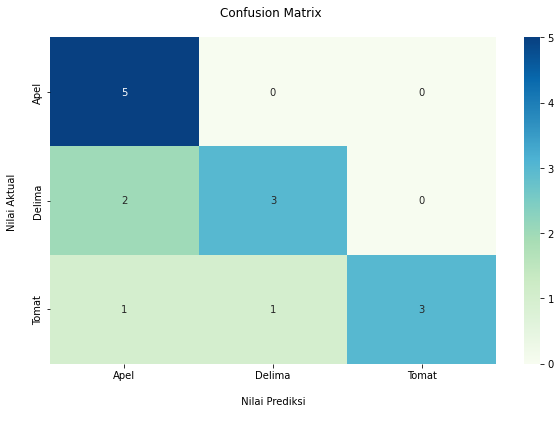

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Bentuk Confusion Matrix dari data yang ada
conv = confusion_matrix(y_true, y_pred)

# Tampilkan dalam bentuk plot heatmap berdasarkan nilai conv
plt.figure(figsize=(10,6))
fx = sns.heatmap(conv, annot=True, fmt=".0f", cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Nilai Prediksi \n')
fx.set_ylabel('Nilai Aktual \n');
fx.xaxis.set_ticklabels(['Apel','Delima','Tomat'])
fx.yaxis.set_ticklabels(['Apel','Delima','Tomat'])
plt.show()

**3. TEMUKAN NILAI AKURASI, PRESISI, RECALL & F1-SCORE**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        Apel       0.62      1.00      0.77         5
      Delima       0.75      0.60      0.67         5
       Tomat       1.00      0.60      0.75         5

    accuracy                           0.73        15
   macro avg       0.79      0.73      0.73        15
weighted avg       0.79      0.73      0.73        15



**4. MENCARI NILAI AKURASI & F1-SCORE (UNTUK MEMASTIKAN MENGGUNAKAN METHOD LAIN)**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average=None)

print("Nilai Akurasi", accuracy)
print("Nilai F1-Score", f1)

Nilai Akurasi 0.7333333333333333
Nilai F1-Score [0.76923077 0.66666667 0.75      ]


**5. MENCARI NILAI SPECIFICITY & SENSITIFITY**

Perlu diingat! Dalam klasifikasi binary, *“sensitivity”* adalah kelas positif dari *recall*; 
Sementara *“specificity”* adalah kelas negatif dari *recall*<br/>
Referensi: [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd

res = []
for l in ['Apel','Delima','Tomat']:
    prec, recall, _, _ = precision_recall_fscore_support(np.array(y_true)==l, np.array(y_pred)==l, pos_label=True, average=None)
    res.append([l, recall[0], recall[1]])

pd.DataFrame(res, columns = ['Kelas', 'Specificity', 'Sensitivity'])

,Kelas,Specificity,Sensitivity
0,Apel,0.7,1.0
1,Delima,0.9,0.6
2,Tomat,1.0,0.6
